In [1]:
%load_ext autoreload
%autoreload 2

from fundus_data_toolkit.data_aug import DAType
from pathlib import Path
from fundus_data_toolkit.datamodules import SEG_PATHS, Task, register_paths
from fundus_data_toolkit.datamodules.segmentation import (
    DDRODMACDataModule,
    APTOSODMACDataModule,
    EYEPACSODMACDataModule,
    IDRIDODMACDataModule,
)
from tqdm.notebook import tqdm

from fundus_data_toolkit.datamodules.utils import merge_existing_datamodules
from nntools import NNOpt

In [2]:
root = Path("/home/clement/Documents/data/OpticDisk/")
ddr_path = root / "DDR/"
aptos_path = root / "APTOS/"
eyepacs_path = root / "EYEPACS/"
idrid_path = root / "IDRID/"
paths = {
    "DDR_ODMAC": ddr_path,
    "APTOS_ODMAC": aptos_path,
    "EYEPACS_ODMAC": eyepacs_path,
    "IDRID_ODMAC": idrid_path,
}
register_paths(paths, Task.SEGMENTATION)

ddr_datamodule = DDRODMACDataModule(data_dir=SEG_PATHS.DDR_ODMAC, batch_size=8, img_size=(1024,1024), precise_autocrop=True).setup_all()
aptos_datamodule = APTOSODMACDataModule(data_dir=SEG_PATHS.APTOS_ODMAC, batch_size=8, img_size=(1024,1024), precise_autocrop=True).setup_all()
eyepacs_datamodule = EYEPACSODMACDataModule(data_dir=SEG_PATHS.EYEPACS_ODMAC, batch_size=8, img_size=(1024,1024), precise_autocrop=True).setup_all()
idrid_datamodule = IDRIDODMACDataModule(data_dir=SEG_PATHS.IDRID_ODMAC, batch_size=8, img_size=(1024,1024), precise_autocrop=True).setup_all()


/home/clement/Documents/Projets/NNTools/src/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


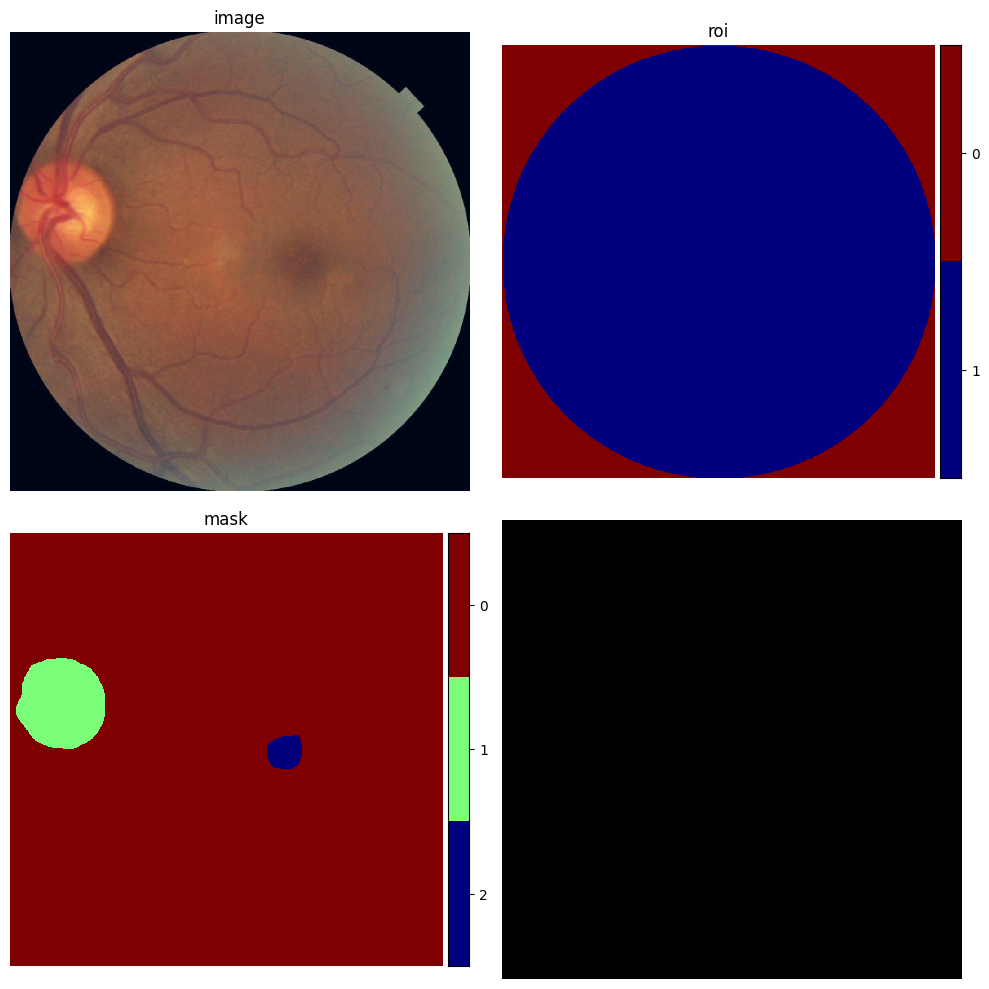

In [4]:
ddr_datamodule.train.plot(0)